Natalia Rutecka
NLP - code from practical 1

In [1]:
import sys

import pprint

import matplotlib.pyplot as plt
import sklearn
from gensim.models import KeyedVectors
from gensim.test.utils import datapath
import random
import nltk

nltk.download('reuters')
nltk.download('pl196x')
import random

import numpy as np
import scipy as sp
from nltk.corpus import reuters
from nltk.corpus.reader import pl196x
from sklearn.decomposition import PCA, TruncatedSVD

START_TOKEN = '<START>'
END_TOKEN = '<END>'

np.random.seed(0)
random.seed(0)


C:\Users\48604\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\48604\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package pl196x to
[nltk_data]     C:\Users\48604\AppData\Roaming\nltk_data...
[nltk_data]   Package pl196x is already up-to-date!


Exercise 1.3
a)

In [2]:
def distinct_words(corpus):
    """ Determine a list of distinct words for the corpus.
        Params:
            corpus (list of list of strings): corpus of documents
        Return:
            corpus_words (list of strings): list of distinct words across the
            corpus, sorted (using python 'sorted' function)
            num_corpus_words (integer): number of distinct words across the
            corpus
    """
    corpus_words = sorted(list({word for doc in corpus for word in doc}))
    return corpus_words, len(corpus_words)

In [3]:
# Define toy corpus
test_corpus = ["START Ala miec kot i pies END".split(" "),
               "START Ala lubic kot END".split(" ")]
test_corpus_words, num_corpus_words = distinct_words(test_corpus)

# Correct answers
ans_test_corpus_words = sorted(list(set([
    'Ala', 'END', 'START', 'i', 'kot', 'lubic', 'miec', 'pies'])))
ans_num_corpus_words = len(ans_test_corpus_words)

# Test correct number of words
assert(num_corpus_words == ans_num_corpus_words), "Incorrect number of distinct words. Correct: {}. Yours: {}".format(ans_num_corpus_words, num_corpus_words)

# Test correct words
assert (test_corpus_words == ans_test_corpus_words), "Incorrect corpus_words.\nCorrect: {}\nYours:   {}".format(str(ans_test_corpus_words), str(test_corpus_words))

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


b)

In [4]:
def compute_co_occurrence_matrix(corpus, window_size=4):
    """ Compute co-occurrence matrix for the given corpus and window_size (default of 4).

        Note: Each word in a document should be at the center of a window.
            Words near edges will have a smaller number of co-occurring words.

              For example, if we take the document "START All that glitters is not gold END" with window size of 4,
              "All" will co-occur with "START", "that", "glitters", "is", and "not".

        Params:
            corpus (list of list of strings): corpus of documents
            window_size (int): size of context window
        Return:
            M (numpy matrix of shape (number of corpus words, number of corpus words)):
                Co-occurence matrix of word counts.
                The ordering of the words in the rows/columns should be the
                same as the ordering of the words given by the distinct_words
                function.
            word2Ind (dict): dictionary that maps word to index
                (i.e. row/column number) for matrix M.
    """
    words, num_words = distinct_words(corpus)
    # ------------------
    # Write your implementation here.
    word2Ind = {words[i]: i for i in range(num_words)}
    M = np.zeros((num_words, num_words))
    for sentence in corpus:
        for i in range(len(sentence)):
            for j in range(max(0, i - window_size), min(len(sentence), i + window_size + 1)):
                if i != j:
                    w_i, w_j = word2Ind[sentence[i]], word2Ind[sentence[j]]
                    M[w_i, w_j] += 1

    # ------------------
    return M, word2Ind

In [5]:
# Define toy corpus and get student's co-occurrence matrix
test_corpus = ["START Ala miec kot i pies END".split(" "),
               "START Ala lubic kot END".split(" ")]
M_test, word2Ind_test = compute_co_occurrence_matrix(
    test_corpus, window_size=1)

# Correct M and word2Ind
M_test_ans = np.array([
    [0., 0., 2., 0., 0., 1., 1., 0.],
    [0., 0., 0., 0., 1., 0., 0., 1.],
    [2., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 1., 0., 0., 1.],
    [0., 1., 0., 1., 0., 1., 1., 0.],
    [1., 0., 0., 0., 1., 0., 0., 0.],
    [1., 0., 0., 0., 1., 0., 0., 0.],
    [0., 1., 0., 1., 0., 0., 0., 0.]
])

word2Ind_ans = {
    'Ala': 0, 'END': 1, 'START': 2, 'i': 3, 'kot': 4, 'lubic': 5, 'miec': 6,
    'pies': 7}

# Test correct word2Ind
assert (word2Ind_ans == word2Ind_test), "Your word2Ind is incorrect:\nCorrect: {}\nYours: {}".format(word2Ind_ans, word2Ind_test)

# Test correct M shape
assert (M_test.shape == M_test_ans.shape), "M matrix has incorrect shape.\nCorrect: {}\nYours: {}".format(M_test.shape, M_test_ans.shape)

# Test correct M values
for w1 in word2Ind_ans.keys():
    idx1 = word2Ind_ans[w1]
    for w2 in word2Ind_ans.keys():
        idx2 = word2Ind_ans[w2]
        student = M_test[idx1, idx2]
        correct = M_test_ans[idx1, idx2]
        if student != correct:
            print("Correct M:")
            print(M_test_ans)
            print("Your M: ")
            print(M_test)
            raise AssertionError("Incorrect count at index ({}, {})=({}, {}) in matrix M. Yours has {} but should have {}.".format(idx1, idx2, w1, w2, student, correct))

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


c)


In [6]:
def reduce_to_k_dim(M, k=2):
    """ Reduce a co-occurence count matrix of dimensionality
        (num_corpus_words, num_corpus_words)
        to a matrix of dimensionality (num_corpus_words, k) using the following
         SVD function from Scikit-Learn:
            - http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

        Params:
            M (numpy matrix of shape (number of corpus words, number
                of corpus words)): co-occurence matrix of word counts
            k (int): embedding size of each word after dimension reduction
        Return:
            M_reduced (numpy matrix of shape (number of corpus words, k)):
            matrix of k-dimensioal word embeddings.
            In terms of the SVD from math class, this actually returns U * S
    """
    n_iters = 10     # Use this parameter in your call to `TruncatedSVD`
    print("Running Truncated SVD over %i words..." % (M.shape[0]))

    # ------------------
    # Write your implementation here.
    M_reduced = sklearn.decomposition.TruncatedSVD(n_components=k, n_iter=n_iters).fit_transform(M)
    # ------------------
    print("Done.")
    return M_reduced

In [7]:
# ---------------------
# Run this sanity check
# Note that this not an exhaustive check for correctness
# In fact we only check that your M_reduced has the right dimensions.
# ---------------------

# Define toy corpus and run student code
test_corpus = ["START Ala miec kot i pies END".split(" "),
               "START Ala lubic kot END".split(" ")]
M_test, word2Ind_test = compute_co_occurrence_matrix(test_corpus, window_size=1)
M_test_reduced = reduce_to_k_dim(M_test, k=2)

# Test proper dimensions
assert (M_test_reduced.shape[0] == 8), "M_reduced has {} rows; should have {}".format(M_test_reduced.shape[0], 8)
assert (M_test_reduced.shape[1] == 2), "M_reduced has {} columns; should have {}".format(M_test_reduced.shape[1], 2)

# Print Success
print("-" * 80)
print("Passed All Tests!")
print("-" * 80)

Running Truncated SVD over 8 words...
Done.
--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


d)


In [8]:
def plot_embeddings(M_reduced, word2Ind, words):
    """ Plot in a scatterplot the embeddings of the words specified
        in the list "words".
        NOTE: do not plot all the words listed in M_reduced / word2Ind.
        Include a label next to each point.

        Params:
            M_reduced (numpy matrix of shape (number of unique words in the
            corpus , k)): matrix of k-dimensioal word embeddings
            word2Ind (dict): dictionary that maps word to indices for matrix M
            words (list of strings): words whose embeddings we want to
            visualize
    """

    # ------------------
    # Write your implementation here.
    xs, ys, labels = [], [], []
    for word in words:
        word_index = word2Ind[word]
        x, y = M_reduced[word_index]
        xs.append(x)
        ys.append(y)
        labels.append(word)
    fig, ax = plt.subplots()
    ax.scatter(xs, ys)
    for i, txt in enumerate(labels):
        ax.annotate(txt, (xs[i], ys[i]), size=10)
    plt.show()
    # ------------------#

--------------------------------------------------------------------------------
Outputted Plot:


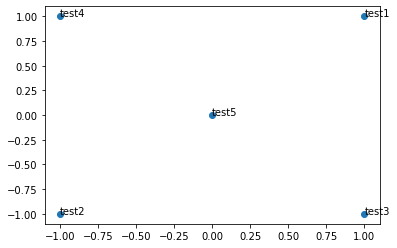

--------------------------------------------------------------------------------


In [9]:
# ---------------------
# Run this sanity check
# Note that this not an exhaustive check for correctness.
# The plot produced should look like the "test solution plot" depicted below.
# ---------------------

print ("-" * 80)
print ("Outputted Plot:")

M_reduced_plot_test = np.array([[1, 1], [-1, -1], [1, -1], [-1, 1], [0, 0]])
word2Ind_plot_test = {
    'test1': 0, 'test2': 1, 'test3': 2, 'test4': 3, 'test5': 4}
words = ['test1', 'test2', 'test3', 'test4', 'test5']
plot_embeddings(M_reduced_plot_test, word2Ind_plot_test, words)

print ("-" * 80)

e)

Running Truncated SVD over 22957 words...
Done.


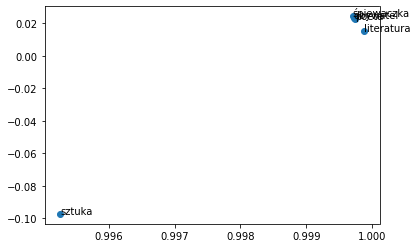

Running Truncated SVD over 22957 words...
Done.


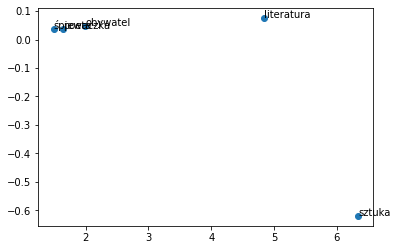

In [10]:
def read_corpus_pl():
    """ Read files from the specified Reuter's category.
        Params:
            category (string): category name
        Return:
            list of lists, with words from each of the processed files
    """
    pl196x_dir = nltk.data.find('corpora/pl196x')
    pl = pl196x.Pl196xCorpusReader(
        pl196x_dir, r'.*\.xml', textids='textids.txt',cat_file="cats.txt")
    tsents = pl.tagged_sents(fileids=pl.fileids(),categories='cats.txt')[:5000]

    return [[START_TOKEN] + [
        w[0].lower() for w in list(sent)] + [END_TOKEN] for sent in tsents]


def plot_unnormalized(corpus, words):
    M_co_occurrence, word2Ind_co_occurrence = compute_co_occurrence_matrix(
        corpus)
    M_reduced_co_occurrence = reduce_to_k_dim(M_co_occurrence, k=2)
    plot_embeddings(M_reduced_co_occurrence, word2Ind_co_occurrence, words)


def plot_normalized(corpus, words):
    M_co_occurrence, word2Ind_co_occurrence = compute_co_occurrence_matrix(
        corpus)
    M_reduced_co_occurrence = reduce_to_k_dim(M_co_occurrence, k=2)
    # Rescale (normalize) the rows to make them each of unit-length
    M_lengths = np.linalg.norm(M_reduced_co_occurrence, axis=1)
    M_normalized = M_reduced_co_occurrence / M_lengths[:, np.newaxis] # broadcasting
    plot_embeddings(M_normalized, word2Ind_co_occurrence, words)

pl_corpus = read_corpus_pl()
words = [
    "sztuka", "śpiewaczka", "literatura", "poeta", "obywatel"]
plot_normalized(pl_corpus, words)
plot_unnormalized(pl_corpus, words)

Exercise 2
a)

In [11]:
wv_from_bin_pl = KeyedVectors.load("word2vec_100_3_polish.bin")

Shuffling words ...
Putting 10000 words into word2Ind and matrix M...
Done.
Running Truncated SVD over 10006 words...
Done.


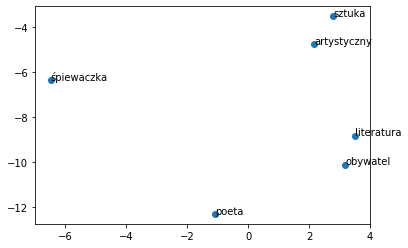

In [12]:
# TODO: a)
def get_matrix_of_vectors(wv_from_bin, required_words):
    """ Put the word2vec vectors into a matrix M.
        Param:
            wv_from_bin: KeyedVectors object; the 3 million word2vec vectors
                         loaded from file
        Return:
            M: numpy matrix shape (num words, 300) containing the vectors
            word2Ind: dictionary mapping each word to its row number in M
    """
    words = list(wv_from_bin.key_to_index.keys())
    print("Shuffling words ...")
    random.shuffle(words)
    words = words[:10000]
    print("Putting %i words into word2Ind and matrix M..." % len(words))
    word2Ind = {}
    M = []
    curInd = 0
    for w in words:
        try:
            M.append(wv_from_bin.get_vector(w))
            word2Ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    for w in required_words:
        try:
            M.append(wv_from_bin.get_vector(w))
            word2Ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    M = np.stack(M)
    print("Done.")
    return M, word2Ind

# -----------------------------------------------------------------
# Run Cell to Reduce 300-Dimensinal Word Embeddings to k Dimensions
# Note: This may take several minutes
# -----------------------------------------------------------------

#################################
# TODO: a)
words = [
    "sztuka", "śpiewaczka", "literatura", "poeta", "artystyczny", "obywatel"]
M, word2Ind = get_matrix_of_vectors(wv_from_bin_pl, words)
M_reduced = reduce_to_k_dim(M, k=2)
plot_embeddings(M_reduced, word2Ind, words)

b)

In [13]:
polysemous_words = ["zamek", "pilot", "słodki"]
for word in polysemous_words:
    print(f"-----------{word}------------")
    print(wv_from_bin_pl.most_similar(word))


-----------zamek------------


C:\Users\48604\AppData\Local\Programs\Python\Python310\lib\site-packages\gensim\models\keyedvectors.py:849: RuntimeWarning: invalid value encountered in divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]


[('zameczek', 0.8462140560150146), ('pałac', 0.7984483242034912), ('zamczysko', 0.785627007484436), ('forteca', 0.7682814002037048), ('grodź', 0.7508893609046936), ('warownia', 0.7442566156387329), ('gród', 0.736450731754303), ('donżon', 0.7312632203102112), ('dworzyszcze', 0.7277812957763672), ('cytadela', 0.7103342413902283)]
-----------pilot------------
[('nawigator', 0.8294645547866821), ('radiooperator', 0.7980995178222656), ('oblatywacz', 0.7636105418205261), ('radiotelegrafista', 0.7463005185127258), ('lotnik', 0.7396376729011536), ('myśliwiec', 0.7340847253799438), ('komandos', 0.73370361328125), ('łącznościowiec', 0.7146121263504028), ('helikopter', 0.7100639939308167), ('desantowiec', 0.7085386514663696)]
-----------słodki------------
[('przesłodki', 0.7481836676597595), ('rozkoszny', 0.7437712550163269), ('słodycz', 0.7355350255966187), ('gorzki', 0.6902108192443848), ('słodko', 0.6878833770751953), ('słodziutki', 0.6659290194511414), ('tkliwy', 0.6632099747657776), ('cierpk

c)

In [14]:
w1 = "kochać"
w2 = "uwielbiać"
w3 = "nienawidzić"
w1_w2_dist = wv_from_bin_pl.distance(w1, w2)
w1_w3_dist = wv_from_bin_pl.distance(w1, w3)

print("Synonyms {}, {} have cosine distance: {}".format(w1, w2, w1_w2_dist))
print("Antonyms {}, {} have cosine distance: {}".format(w1, w3, w1_w3_dist))

Synonyms kochać, uwielbiać have cosine distance: 0.373593807220459
Antonyms kochać, nienawidzić have cosine distance: 0.22562378644943237


d)


In [15]:
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=["chłopiec", "dorosły"], negative=["dziecko"]))

[('mężczyzna', 0.6670641303062439),
 ('nastolatek', 0.6582932472229004),
 ('podrostek', 0.6514867544174194),
 ('młody', 0.6485521197319031),
 ('młodzik', 0.6434695720672607),
 ('młodociany', 0.6215085387229919),
 ('młodzieniec', 0.6047544479370117),
 ('długowłosy', 0.601329505443573),
 ('nieznajomy', 0.5939396023750305),
 ('misiowaty', 0.5928362607955933)]


e)


In [16]:
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=["talerz", "pić"], negative=["jeść"]))


[('popijać', 0.741878867149353),
 ('wypijać', 0.7119614481925964),
 ('popijała', 0.7065809965133667),
 ('nalewać', 0.6865079402923584),
 ('wypić', 0.6754423379898071),
 ('pijać', 0.6719720363616943),
 ('częstować', 0.6708579659461975),
 ('dopijać', 0.6629468202590942),
 ('zajadać', 0.6566815376281738),
 ('zapijać', 0.6464109420776367)]


f)


In [17]:
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=['kobieta', 'szef'], negative=['mezczyzna']))
print()
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=['mezczyzna', 'prezes'], negative=['kobieta']))


[('własika', 0.5678122639656067),
 ('agent', 0.5483713150024414),
 ('oficer', 0.5411549210548401),
 ('esperów', 0.5383270978927612),
 ('interpol', 0.5367037653923035),
 ('antyterrorystyczny', 0.5327680110931396),
 ('komisarz', 0.5326411128044128),
 ('europolu', 0.5274547338485718),
 ('bnd', 0.5271410346031189),
 ('pracownik', 0.5215375423431396)]

[('wiceprezes', 0.6396454572677612),
 ('czlonkiem', 0.5929950475692749),
 ('przewodniczący', 0.5746127963066101),
 ('czlonek', 0.5648552179336548),
 ('przewodniczacym', 0.5586849451065063),
 ('wiceprzewodniczący', 0.5560489892959595),
 ('obowiazków', 0.5549101233482361),
 ('obowiazani', 0.5544129610061646),
 ('dyrektor', 0.5513691306114197),
 ('obowiazany', 0.5471130609512329)]


g)

In [18]:
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=['lekarz', 'kobieta'], negative=['mezczyzna']))


[('pielęgniarka', 0.652389645576477),
 ('lekarka', 0.6262717247009277),
 ('osoba', 0.6237451434135437),
 ('chirurg', 0.6050892472267151),
 ('psychiatra', 0.5909774303436279),
 ('pacjent', 0.5898064374923706),
 ('ginekolog', 0.5640532970428467),
 ('akuszerka', 0.5627631545066833),
 ('dziewczę', 0.5559123754501343),
 ('logopeda', 0.5546327829360962)]


i)

In [19]:
import gensim
word2vec = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)


In [20]:
polysemous_words = ["bar", "jam"]
for word in polysemous_words:
    print(f"-----------{word}------------")
    print(word2vec.most_similar(word))


-----------bar------------
[('Bar', 0.656773567199707), ('bars', 0.6537090539932251), ('tavern', 0.6364459991455078), ('pub', 0.6000003814697266), ('nightspot', 0.5897086262702942), ('nightclub', 0.5828037261962891), ('Pub', 0.5696172714233398), ('bartender', 0.5664138197898865), ('restaurant', 0.5545204281806946), ('Lounge', 0.5305414199829102)]
-----------jam------------
[('jams', 0.7726219892501831), ('jamming', 0.5279730558395386), ('bases_loaded_jam', 0.5009481906890869), ('Mariano_Rivera_wriggled', 0.495868980884552), ('jam_unscathed', 0.49118298292160034), ('TJ_Rushing_fumbled', 0.48921874165534973), ('miter_gate', 0.4834982454776764), ('baked_goods_jellies', 0.458962082862854), ('Inglett_grounded', 0.4589618742465973), ('hootenanny', 0.4570198059082031)]


Synonyms of a word "bar" are all related to a tavern/restaurant although the word has multiple other meanings, eg. scroll bar, chocolate bar etc. An example of a word that is close to its synonims with multiple meanings is a word "jam" - it has close synonims relating to both food and music improvisation.

In [21]:
w1 = "love"
w2 = "adore"
w3 = "hate"
w1_w2_dist = word2vec.distance(w1, w2)
w1_w3_dist = word2vec.distance(w1, w3)

print("Synonyms {}, {} have cosine distance: {}".format(w1, w2, w1_w2_dist))
print("Antonyms {}, {} have cosine distance: {}".format(w1, w3, w1_w3_dist))


Synonyms love, adore have cosine distance: 0.3183126449584961
Antonyms love, hate have cosine distance: 0.3996043801307678


Contrary to Polish translations, the words love and adore are closer to each other than love and hate. One of the reasons might be that, comparing to Polish, the word "hate" is more often used in the context of hate comments/hate crimes.

In [22]:
w1 = "smart"
w2 = "dumb"
w3 = "clever"
w1_w2_dist = word2vec.distance(w1, w2)
w1_w3_dist = word2vec.distance(w1, w3)

print("Synonyms {}, {} have cosine distance: {}".format(w1, w2, w1_w2_dist))
print("Antonyms {}, {} have cosine distance: {}".format(w1, w3, w1_w3_dist))

Synonyms smart, dumb have cosine distance: 0.42073047161102295
Antonyms smart, clever have cosine distance: 0.43432676792144775


The words "smart" and "dumb" are more close in the space than "smart" and "clever". That probably results from first two words being more informal and therefore more often used in the same context.

In [23]:
pprint.pprint(word2vec.most_similar(
    positive=["plate", "drink"], negative=["eat"]))

[('bottle', 0.4425586760044098),
 ('keg', 0.43914172053337097),
 ('plates', 0.43516722321510315),
 ('pint_glass', 0.42473798990249634),
 ('cranberry_vodka', 0.4176194965839386),
 ('brandy_snifter', 0.41758719086647034),
 ('vodka_gin', 0.41383081674575806),
 ('jug', 0.41124358773231506),
 ('###ml_glasses', 0.41051000356674194),
 ('alcohol', 0.4098261892795563)]


Interestingly, in English the analogy eat:plate :: drink:x is solved sensibly with x="bottle"

In [24]:
pprint.pprint(word2vec.most_similar(
    positive=["witcher", "woman"], negative=["man"]))

[('Geralt', 0.4971220791339874),
 ('changeling', 0.49188873171806335),
 ('giantess', 0.490115761756897),
 ('Tivii', 0.48267918825149536),
 ('wizard_Howl', 0.48094767332077026),
 ('frog_prince', 0.4786548614501953),
 ('necromancer', 0.47633692622184753),
 ('humanoid_creature', 0.47624415159225464),
 ('Mameha', 0.4761201739311218),
 ('sorceress', 0.47353726625442505)]


The analogy man:witcher :: woman:x is not solved correctly. The model's answer is "Geralt" whereas the expected answer is witch/sorceress.

In [25]:
pprint.pprint(word2vec.most_similar(
    positive=["doctor", "she"], negative=["he"]))


[('nurse', 0.6588720679283142),
 ('gynecologist', 0.647172212600708),
 ('nurse_practitioner', 0.6255376935005188),
 ('midwife', 0.6002784371376038),
 ('pediatrician', 0.5921324491500854),
 ('dermatologist', 0.5582225322723389),
 ('ob_gyn', 0.5563921928405762),
 ('pharmacist', 0.5559877753257751),
 ('doctors', 0.5544067621231079),
 ('nurse_midwife', 0.554105281829834)]
